In [1]:
import pandas as pd
import os
import sys
import numpy as np
from glob import glob

import cv2
import matplotlib.pyplot as plt

from tqdm import tqdm


def read_txt(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        lines = [line.strip().split(',') for line in lines]
        return lines


def load_image(img_path):
    img_arr = cv2.imread(img_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

In [2]:
challenge_names = ['AU_Detection_Challenge',
                   'EXPR_Classification_Challenge',
                   'MTL_Challenge',
                   'VA_Estimation_Challenge']

# challenge_cols = ['AU_Detection_Cha']
splits = ['Train_Set', 'Validation_Set']
PATH = '/mnt/DATA2/congvm/Affwild2/Annotations/'
# CROP_PATHS = '/mnt/DATA2/congvm/Affwild2/cropped_aligned/'
# CROP_PATHS = '/mnt/DATA2/congvm/Affwild2/images/'
CROP_PATHS= '/mnt/DATA2/congvm/Affwild2/cropped_aligned'

In [3]:
# Check MTL File
df = pd.read_csv('/mnt/DATA2/congvm/Affwild2/mtl_train_anno.csv')
df


,VideoID,FrameID,Valence,Arousal,Expression,AU1,AU2,AU4,AU6,AU7,AU10,AU12,AU15,AU23,AU24,AU25,AU26
0,426,00001.jpg,0.0,0.054,0,0,0,0,0,0,1,0,0,0,0,0,0
1,426,00003.jpg,0.0,0.077,0,0,0,0,0,0,0,0,0,0,0,1,0
2,426,00007.jpg,0.0,0.117,0,0,0,0,0,0,0,0,0,0,0,1,0
3,426,00050.jpg,0.0,0.156,-1,0,0,0,0,0,0,0,0,0,0,1,0
4,426,00060.jpg,0.0,0.156,4,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142459,video48,02518.jpg,-5.0,-5.000,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
142460,video48,02522.jpg,-5.0,-5.000,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
142461,video48,02526.jpg,-5.0,-5.000,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
142462,video48,02530.jpg,-5.0,-5.000,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


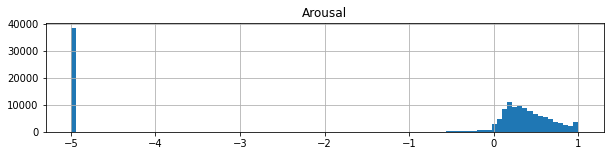

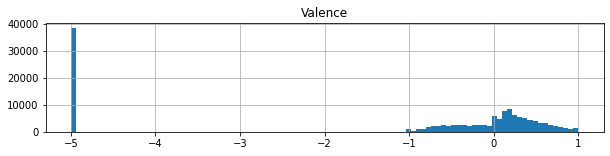

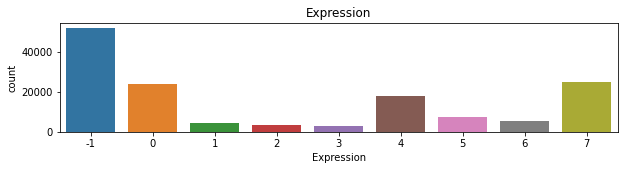

In [4]:
import seaborn as sns
plt.figure(figsize=(10, 2))
df.Arousal.hist(bins=100)
plt.title("Arousal")
plt.show()
plt.figure(figsize=(10, 2))
df.Valence.hist(bins=100)
plt.title("Valence")
plt.show()

plt.figure(figsize=(10, 2))
sns.countplot(df.Expression)
plt.title("Expression")
plt.show()


Image Shape:  (112, 112, 3)


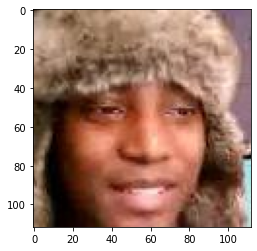

In [5]:
img_arr = cv2.imread('/mnt/DATA2/congvm/Affwild2/cropped_aligned/131/00344.jpg')[..., ::-1]
print('Image Shape: ', img_arr.shape)
plt.imshow(img_arr)

In [6]:
df.Valence = df.Valence.astype(np.float32)
df.Arousal = df.Arousal.astype(np.float32)

In [7]:
df_grouped = df.groupby(by="VideoID").agg(
    {"FrameID": list, "Valence": list, "Arousal": list, "Expression": list}
).reset_index()
df_grouped

,VideoID,FrameID,Valence,Arousal,Expression
0,1-30-1280x720,"[00001.jpg, 00020.jpg, 00022.jpg, 00024.jpg, 0...","[0.14800000190734863, 0.19499999284744263, 0.2...","[0.35199999809265137, 0.3619999885559082, 0.37...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
1,10-60-1280x720,"[00001.jpg, 00001.jpg, 00002.jpg, 00004.jpg, 0...","[0.14800000190734863, 0.14800000190734863, 0.2...","[-0.37599998712539673, -0.37599998712539673, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
2,10-60-1280x720_right,"[00305.jpg, 00309.jpg, 00313.jpg, 00317.jpg, 0...","[-5.0, -5.0, -5.0, 0.13300000131130219, 0.1640...","[-5.0, -5.0, -5.0, 0.0, 0.05400000140070915, 0...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
3,100-29-1080x1920,"[00001.jpg, 00002.jpg, 00002.jpg, 00004.jpg, 0...","[-0.1860000044107437, -0.4480000138282776, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.21899999678134918,...","[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1..."
4,101-30-1080x1920,"[00022.jpg, 00028.jpg, 00032.jpg, 00033.jpg, 0...","[0.0, 0.0, 0.0, 0.0, 0.0020000000949949026, 0....","[0.017000000923871994, 0.020999999716877937, 0...","[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1..."
...,...,...,...,...,...
252,video7,"[00001.jpg, 00005.jpg, 00009.jpg, 00013.jpg, 0...","[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....","[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....","[0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
253,video79,"[00001.jpg, 00007.jpg, 00013.jpg, 00014.jpg, 0...","[0.18700000643730164, 0.18700000643730164, 0.1...","[0.36899998784065247, 0.38499999046325684, 0.3...","[6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
254,video8,"[00044.jpg, 00075.jpg, 00079.jpg, 00083.jpg, 0...","[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....","[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
255,video93,"[00001.jpg, 00043.jpg, 00054.jpg, 00064.jpg, 0...","[0.6610000133514404, 0.7160000205039978, 0.716...","[0.550000011920929, 0.4950000047683716, 0.5659...","[4, 4, 4, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [8]:
# Load the seperated dataset
expr_train_paths = glob('/mnt/DATA2/congvm/Affwild2/Annotations/EXPR_Classification_Challenge/Train_Set/*.txt')
for path in expr_train_paths:
    d = read_txt(path)
    break
print(path)
len(d[1:])

/mnt/DATA2/congvm/Affwild2/Annotations/EXPR_Classification_Challenge/Train_Set/428.txt


3229

In [9]:
df_selected = df_grouped[df_grouped.VideoID == '428']
df_selected

,VideoID,FrameID,Valence,Arousal,Expression


100%|██████████| 248/248 [00:05<00:00, 48.16it/s] 


[0 1 2 3 4 5 6 7]


100%|██████████| 70/70 [00:00<00:00, 121.66it/s]


[0 1 2 3 4 5 6 7]


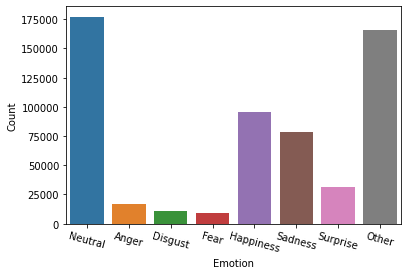

Text(0, 0.5, 'Count')

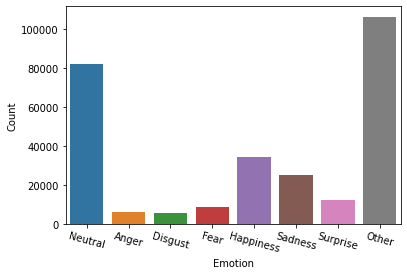

In [10]:
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

EMOTION_MAP = {
    0: "Neutral",
    1: "Anger",
    2: "Disgust",
    3: "Fear",
    4: "Happiness",
    5: "Sadness",
    6: "Surprise",
    7: "Other",
}


data_dir = (
    "/home/lab/congvm/Affwild2//saved_labels/EXPR_Classification_Challenge/Train_Set"
)
list_csv = glob(data_dir + "/*.csv")
df = pd.DataFrame()
for i in tqdm(list_csv, total=len(list_csv)):
    df = pd.concat((df, pd.read_csv(i)), axis=0).reset_index(drop=True)

labels = df.labels_ex
label_unique = labels.unique()
label_unique.sort()
print(label_unique)
train_label = labels.copy()


data_dir = (
    "/home/lab/congvm/Affwild2/saved_labels/EXPR_Classification_Challenge/Validation_Set"
)
list_csv = glob(data_dir + "/*.csv")
df = pd.DataFrame()
for i in tqdm(list_csv, total=len(list_csv)):
    df = pd.concat((df, pd.read_csv(i)), axis=0).reset_index(drop=True)

labels = df.labels_ex
label_unique = labels.unique()
label_unique.sort()
print(label_unique)
val_label = labels.copy()

sns.countplot(train_label)
_ = plt.xticks(range(0, 8), list(EMOTION_MAP.values()), rotation=-15)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

sns.countplot(val_label)
_ = plt.xticks(range(0, 8), list(EMOTION_MAP.values()), rotation=-15)
plt.xlabel("Emotion")
plt.ylabel("Count")

In [11]:
EMOTION_MAP

{0: 'Neutral',
 1: 'Anger',
 2: 'Disgust',
 3: 'Fear',
 4: 'Happiness',
 5: 'Sadness',
 6: 'Surprise',
 7: 'Other'}

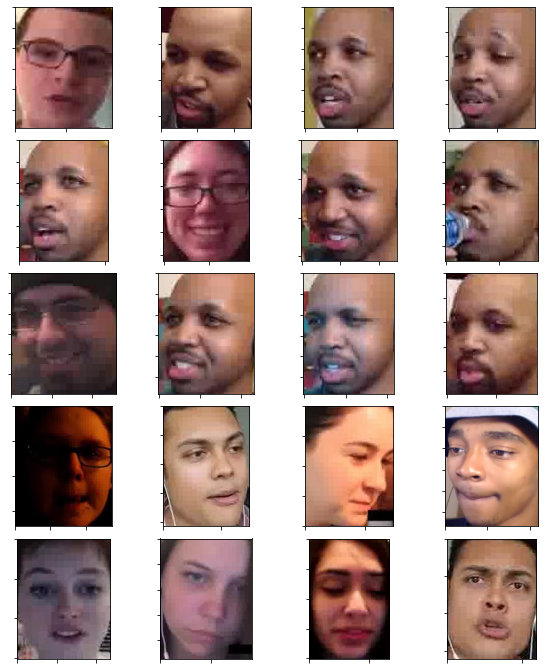

In [12]:
import mipkit
other_df = df[df.labels_ex == 7]
other_indices = np.random.choice(len(other_df), 20)
other_selected_df = other_df.iloc[other_indices]

list_img_arr = []
for i, it in other_selected_df.iterrows():
    img_arr = cv2.imread(it.image_id)[..., ::-1]
    list_img_arr.append(img_arr)

mipkit.immulshow(list_img_arr, rows=5)

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

img_combined_arrs = []
for i in range(0, 8):
    other_df = df[df.labels_ex == i]
    other_indices = np.random.choice(len(other_df), 20)
    other_selected_df = other_df.iloc[other_indices]

    list_img_arr = []
    for _, it in other_selected_df.iterrows():
        img_arr = cv2.imread(it.image_id)[..., ::-1]
        list_img_arr.append(img_arr)

    fig = mipkit.immulshow(
        list_img_arr,
        rows=5,
        title=f"{EMOTION_MAP[i]}",
        ratio_size=5,
        title_rel_pos=1,
        plt_show=False,
        return_fig=True
    )
    canvas = FigureCanvas(fig)
    _ = canvas.draw()
    img_combined_arr = np.frombuffer(canvas.tostring_rgb(), dtype="uint8")
    img_combined_arr = img_combined_arr.reshape(
        fig.canvas.get_width_height()[::-1] + (3,)
    )
    img_combined_arrs.append(img_combined_arr)


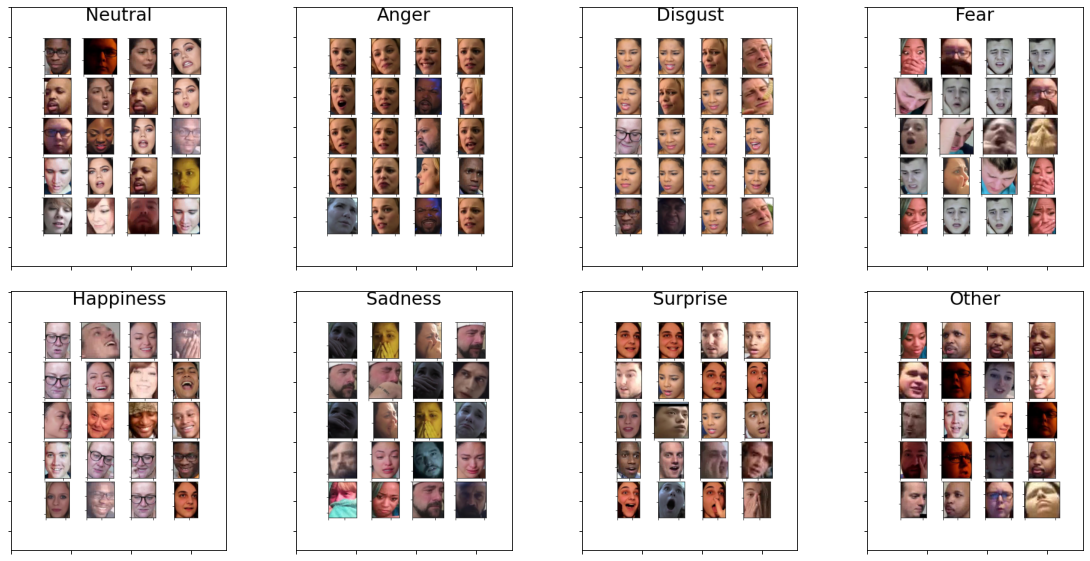

In [15]:
mipkit.immulshow(img_combined_arrs, rows=2)